# CNN

In [1]:
#TensorFlowがGPUを認識しているか確認
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

/home/cuda/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/cuda/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/cuda/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/cuda/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWa

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 11887363152957058908, name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 1775254773943465033
 physical_device_desc: "device: XLA_GPU device", name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 8343819141293337606
 physical_device_desc: "device: XLA_CPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 3616473088
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 10681464036417189614
 physical_device_desc: "device: 0, name: GeForce GTX 980, pci bus id: 0000:01:00.0, compute capability: 5.2"]

In [1]:
#tensorflowをtfとしてインポート
import tensorflow as tf

#pltをインポート
%matplotlib inline
import matplotlib.pyplot as plt

import keras
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential, Model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.preprocessing.image import array_to_img, img_to_array, load_img
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import re

/home/cuda/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/cuda/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/cuda/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/cuda/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWa

In [2]:
#import circle.py
from keras.models import Sequential
from keras.layers import Activation,Dense,Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

x_train, x_test, y_train, y_test = np.load('./data/dataset.npy', allow_pickle = True)
batch_size = 1
epochs = 1

#モデルを作成
model = Sequential()
#conv１層目
model.add(Conv2D(1, (3, 3), padding='same', input_shape=(64, 64, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#conv２層目
model.add(Conv2D(2, (3, 3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#conv３層目
model.add(Conv2D(4, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
        
#conv４層目
#model.add(Conv2D(256, (3, 3), padding='same'))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))

          
model.add(Flatten())
#model.add(Dropout(0.5))
#model.add(Dense(64))
#model.add(Activation('relu'))
model.add(Dense(5))
model.add(Activation('softmax'))
          
# サマリーを出力
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 1)         10        
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 1)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 2)         20        
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 2)         0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 2)         0         
_________________________________________________________________
conv

In [3]:
#モデルのコンパイル
#WEIGHTS_PATH = 'layer3channel1_weights.hdf5'
#model.load_weights(WEIGHTS_PATH)
model.compile(optimizer='adam',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

#予測
history = model.fit(x_train, y_train, epochs=50, validation_data = (x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 35840 samples, validate on 8960 samples
Epoch 1/50
35840/35840 [==============================] - 6s 164us/step - loss: 0.9225 - acc: 0.6204 - val_loss: 0.3140 - val_acc: 0.9096
Epoch 2/50
35840/35840 [==============================] - 5s 128us/step - loss: 0.1969 - acc: 0.9475 - val_loss: 0.1275 - val_acc: 0.9673
Epoch 3/50
35840/35840 [==============================] - 5s 128us/step - loss: 0.0955 - acc: 0.9753 - val_loss: 0.0738 - val_acc: 0.9826
Epoch 4/50
35840/35840 [==============================] - 5s 129us/step - loss: 0.0548 - acc: 0.9866 - val_loss: 0.0435 - val_acc: 0.9882
Epoch 5/50
35840/35840 [==============================] - 5s 130us/step - loss: 0.0339 - acc: 0.9922 - val_loss: 0.0278 - val_acc: 0.9935
Epoch 6/50
35840/35840 [==============================] - 5s 129us/step - loss: 0.0226 - acc: 0.9953 - val_loss: 0.0187 - val_acc: 0.9962
Epoch 7/50
35840/35840 [==============================] - 5s 130us/step - l

In [4]:
#学習済みのモデルでテスト
score = model.evaluate(x_test, y_test)
print('test loss:',score[0])
print('test acc:',score[1])

8960/8960 [==============================] - 0s 52us/step
test loss: 0.0007217147444855243
test acc: 0.9998883928571428


In [5]:
classes = model.predict(x_test, batch_size=128, verbose=True)
print(classes[0])

8960/8960 [==============================] - 0s 31us/step
[1.3749500e-36 1.0000000e+00 2.4366316e-24 2.9516915e-15 0.0000000e+00]


In [6]:
#save model
model_layer3channel1_json = model.to_json()
open("model_architecture.json", mode='w').write(model_layer3channel1_json)

#save weight
model.save_weights("layer3channel1_weights.hdf5")

In [7]:
#出力する中間層を指定　０〜３そうめ
layer_outputs = [layer.output for layer in model.layers[0:3]]
layer_outputs

[<tf.Tensor 'conv2d_1/BiasAdd:0' shape=(?, 64, 64, 1) dtype=float32>,
 <tf.Tensor 'activation_1/Relu:0' shape=(?, 64, 64, 1) dtype=float32>,
 <tf.Tensor 'max_pooling2d_1/MaxPool:0' shape=(?, 32, 32, 1) dtype=float32>]

In [8]:
#中間層を出力するモデルを作成
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activation_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 1)         10        
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 1)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 1)         0         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [9]:
weights = model.get_layer("conv2d_1").get_weights()[0]
weights.shape
weights

array([[[[ 1.3162555 ]],

        [[-0.63436174]],

        [[-0.5477194 ]]],


       [[[-2.0495121 ]],

        [[-0.61006445]],

        [[ 1.6829942 ]]],


       [[[ 1.4094963 ]],

        [[ 0.3166146 ]],

        [[-1.2461984 ]]]], dtype=float32)

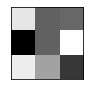

In [10]:
def plot_conv_weights(filters):
    filter_num = filters.shape[3]
    
    for i in range(filter_num):
        plt.subplot(filter_num/6 + 1, 4, i+1)
        plt.imshow(filters[:,:,0,i], cmap="gray")
        plt.xticks([])
        plt.yticks([])
        
plot_conv_weights(model.layers[0].get_weights()[0])

(1, 64, 64, 1)
(1, 64, 64, 1)


/home/cuda/.local/lib/python3.6/site-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


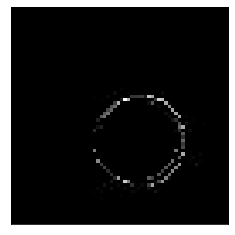

In [11]:
#円の特徴マップ
#check input image
img_path = './data/circle/circler12_1105.jpg'
#img_list = glob.glob(img_path + '*')
size = (64, 64, 1)
img = load_img(img_path, grayscale = True, target_size=size)
x = img_to_array(img)
#x = np.expand_dims(x, axis=0)
img_tensor = x/255
img_tensor = img_tensor[np.newaxis, ...]
print(img_tensor.shape)
#plt.imshow(img_tensor[0])
#plt.show()

activations = activation_model.predict(img_tensor)
#print(len(activations))
#print(activations)

first_layer_activation = activations[1]
print(first_layer_activation.shape)

k = 0
for i in range(1):
    plt.imshow(first_layer_activation[0,:,:,i],cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.savefig('data/l3c1/circle/circle12_1105_%d.jpg'%k)
    k = k + 1
    plt.show()

(1, 64, 64, 1)
(1, 64, 64, 1)


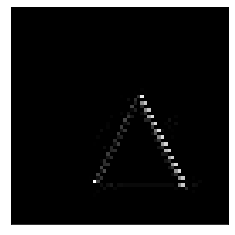

In [13]:
#三角形の特徴マップ
#check input image
img_path = './data/triangle/triangle12_1105.jpg'
#img_list = glob.glob(img_path + '*')
size = (64, 64, 1)
img = load_img(img_path, grayscale = True, target_size=size)
x = img_to_array(img)
#x = np.expand_dims(x, axis=0)
img_tensor = x/255
img_tensor = img_tensor[np.newaxis, ...]
print(img_tensor.shape)
#plt.imshow(img_tensor[0])
#plt.show()

activations = activation_model.predict(img_tensor)
#print(len(activations))
#print(activations)

first_layer_activation = activations[1]
print(first_layer_activation.shape)

k = 0
for i in range(1):
    plt.imshow(first_layer_activation[0,:,:,i],cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.savefig('data/l3c1/triangle/triangle12_1105_%d.jpg'%k)
    k = k + 1
    plt.show()

(1, 64, 64, 1)
(1, 64, 64, 1)


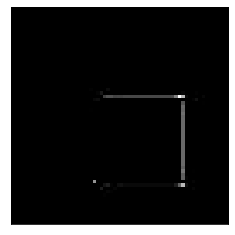

In [15]:
#四角形の特徴マップ
#check input image
img_path = './data/rectangle/rectangle12_1105.jpg'
#img_list = glob.glob(img_path + '*')
size = (64, 64, 1)
img = load_img(img_path, grayscale = True, target_size=size)
x = img_to_array(img)
#x = np.expand_dims(x, axis=0)
img_tensor = x/255
img_tensor = img_tensor[np.newaxis, ...]
print(img_tensor.shape)
#plt.imshow(img_tensor[0])
#plt.show()

activations = activation_model.predict(img_tensor)
#print(len(activations))
#print(activations)

first_layer_activation = activations[1]
print(first_layer_activation.shape)

k = 0
for i in range(1):
    plt.imshow(first_layer_activation[0,:,:,i],cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.savefig('data/l3c1/rectangle/rectangle12_1105_%d.jpg'%k)
    k = k + 1
    plt.show()

(1, 64, 64, 1)
(1, 64, 64, 1)


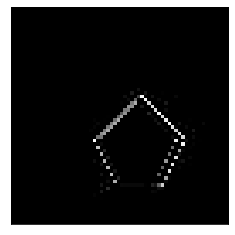

In [17]:
#五角形の特徴マップ
#check input image
img_path = './data/pentagon/pentagon12_1105.jpg'
#img_list = glob.glob(img_path + '*')
size = (64, 64, 1)
img = load_img(img_path, grayscale = True, target_size=size)
x = img_to_array(img)
#x = np.expand_dims(x, axis=0)
img_tensor = x/255
img_tensor = img_tensor[np.newaxis, ...]
print(img_tensor.shape)
#plt.imshow(img_tensor[0])
#plt.show()

activations = activation_model.predict(img_tensor)
#print(len(activations))
#print(activations)

first_layer_activation = activations[1]
print(first_layer_activation.shape)

k = 0
for i in range(1):
    plt.imshow(first_layer_activation[0,:,:,i],cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.savefig('data/l3c1/pentagon/pentagon12_1105_%d.jpg'%k)
    k = k + 1
    plt.show()

(1, 64, 64, 1)
(1, 64, 64, 1)


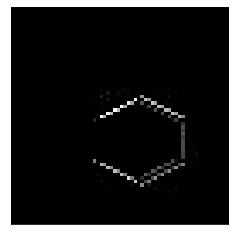

In [18]:
#六角形の特徴マップ
#check input image
img_path = './data/hexagon/hexagon12_1105.jpg'
#img_list = glob.glob(img_path + '*')
size = (64, 64, 1)
img = load_img(img_path, grayscale = True, target_size=size)
x = img_to_array(img)
#x = np.expand_dims(x, axis=0)
img_tensor = x/255
img_tensor = img_tensor[np.newaxis, ...]
print(img_tensor.shape)
#plt.imshow(img_tensor[0])
#plt.show()

activations = activation_model.predict(img_tensor)
#print(len(activations))
#print(activations)

first_layer_activation = activations[1]
print(first_layer_activation.shape)

k = 0
for i in range(1):
    plt.imshow(first_layer_activation[0,:,:,i],cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.savefig('data/l3c1/hexagon/hexagon12_1105_%d.jpg'%k)
    k = k + 1
    plt.show()